In [ ]:
# Загрузим все необходимые библиотеки
import os
import numpy as np
import pandas as pd

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot




url='https://drive.google.com/file/d/1sf3DVRxJwKTN0pAASXKjEZsW8EqZ04Wu/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url)
df = df1.drop(labels=['Original'], axis=1)

print(df.head())


   BodyFat Sex  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     12.3   M   23   69.97    1.72  36.2   93.1     85.2   94.5   59.0  37.3   
1      6.1   M   22   78.59    1.84  38.5   93.6     83.0   98.7   58.7  37.3   
2     25.3   M   22   69.85    1.68  34.0   95.8     87.9   99.2   59.6  38.9   
3     10.4   M   26   83.80    1.84  37.4  101.8     86.4  101.2   60.1  37.3   
4     28.7   M   24   83.58    1.81  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


In [ ]:
df.isnull().sum()


BodyFat    0
Sex        0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

Построим пару графиков для статистического анализа

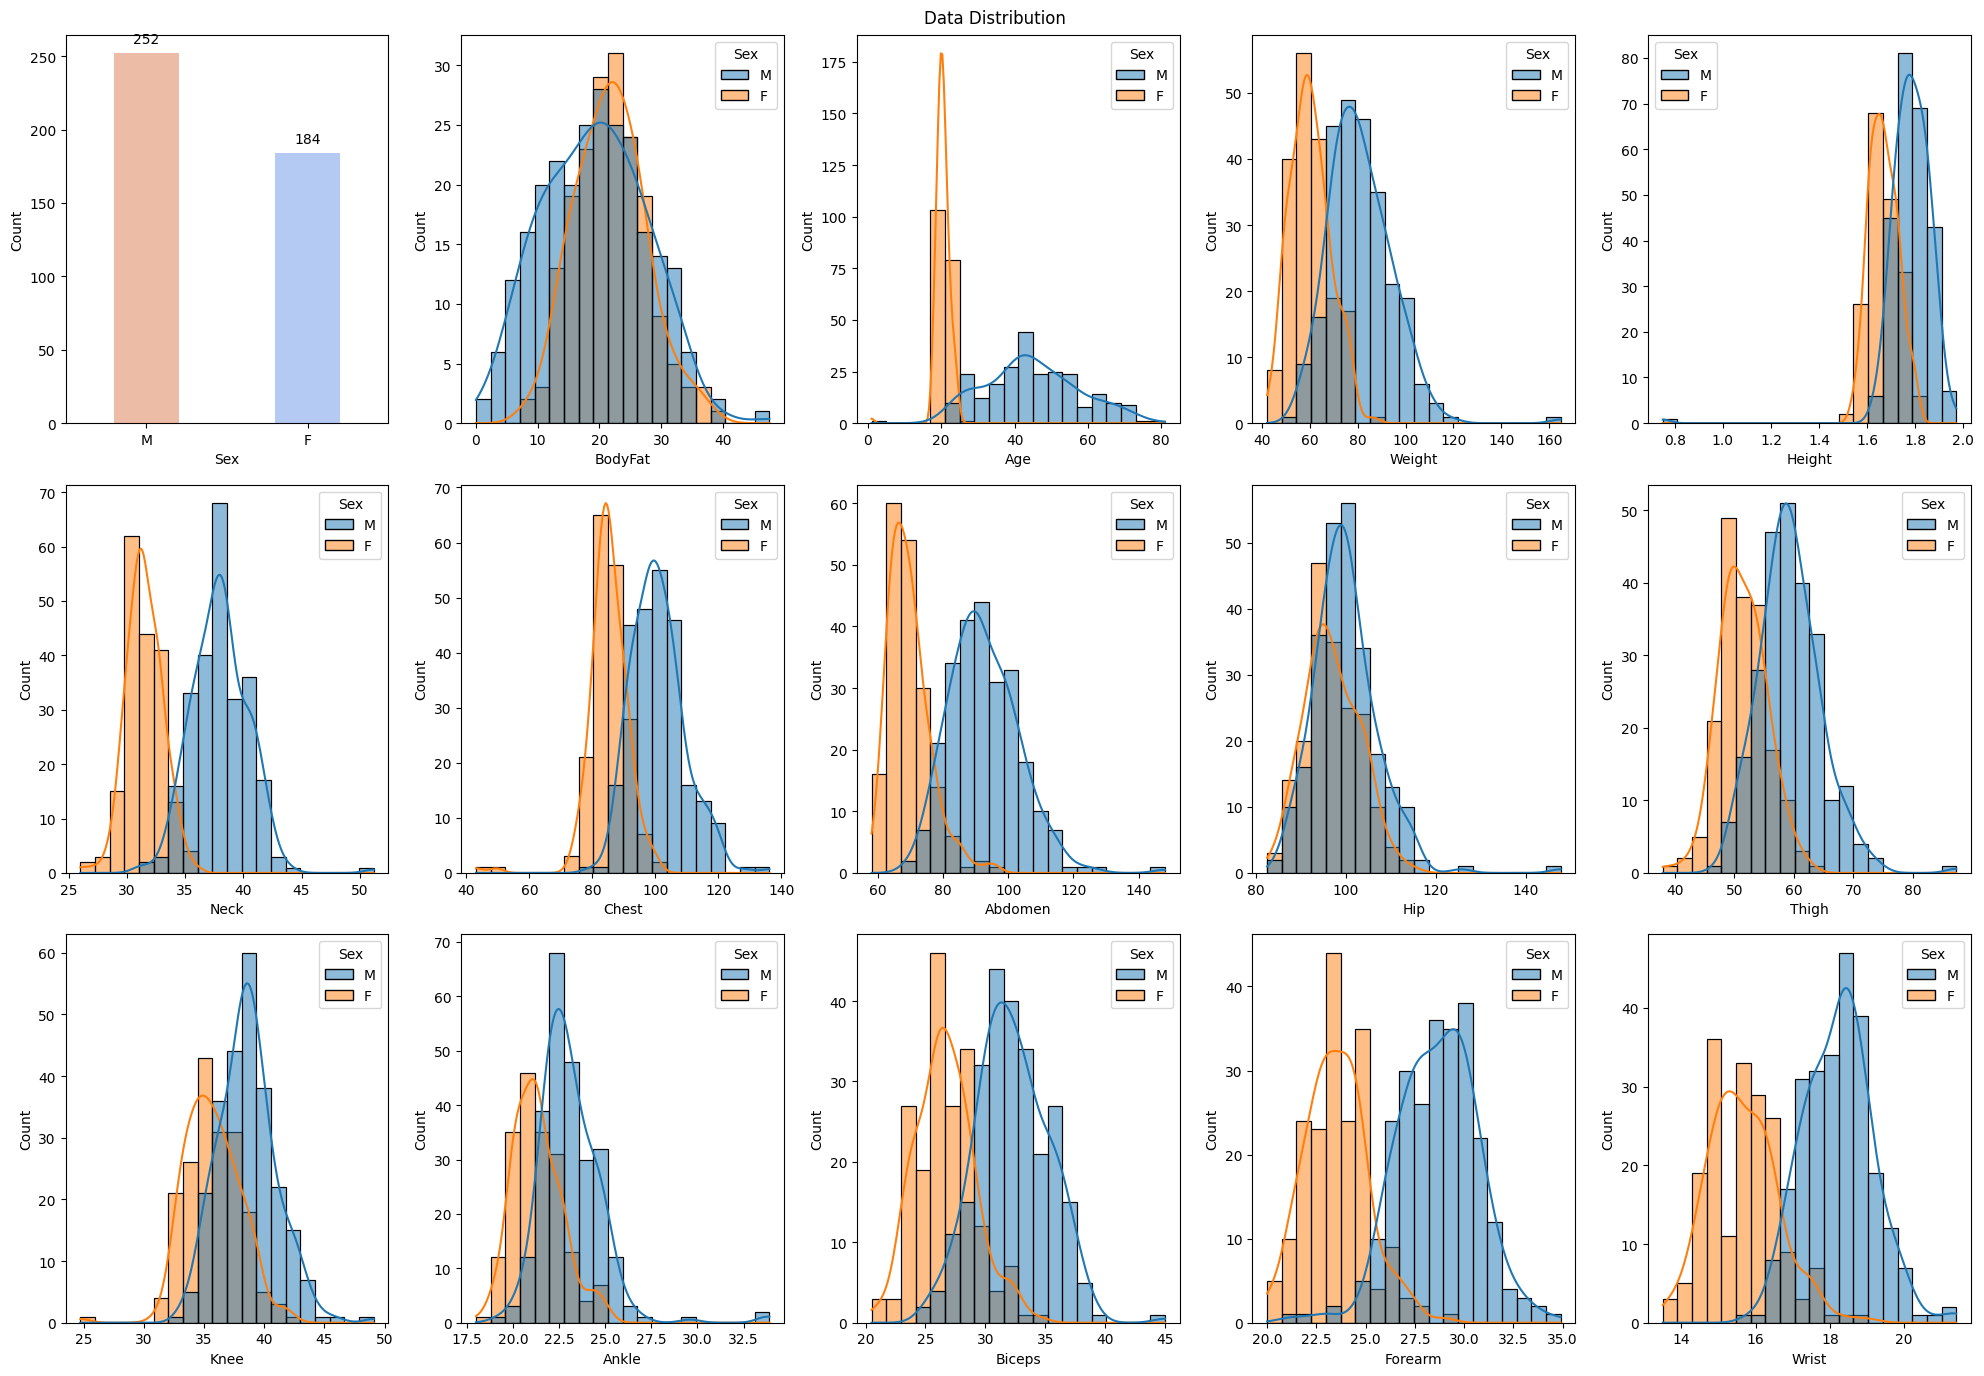

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

figure, axes = plt.subplots(3, 5, figsize=(20, 14))
figure.suptitle("Data Distribution")
axes = axes.flatten()
ax = sns.countplot(data=df, x='Sex', hue='Sex', ax=axes[0], width=0.4, palette="coolwarm_r")
ax.set_ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
count = 1
columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in columns:
    sns.histplot(data=df, x=col, hue='Sex', bins=20, kde=True, ax=axes[count])
    count += 1
plt.tight_layout()

df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'F' else 0)


Тренируем нейронку и проверяем

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


x_df = df.copy()
x_df = x_df.drop(labels=['BodyFat'], axis=1)
y_df = df['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(x_df,
                                                    y_df,
                                                    shuffle=True,
                                                    test_size=0.2)


print(X_train.head())



n = LinearRegression()
n.fit(X_train, y_train)
y_pred = n.predict(X_test)
#print(y_test.to_list() ,'                          asdsadasdasdsadsadasmkjjjjjjjjjjjjjjjjjjjj               ',  y_pred)
#a = (0.1 > y_test - y_pred > 0.1).sum().item()
r2_score(y_test, y_pred)
#for i in range(len(y_test.to_list())):
#  print(y_test.to_list()[i] - y_pred[i])




     Sex  Age   Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
307    1   22  62.1432  1.6256  32.5   90.5     70.3   97.5   55.0  35.5   
296    1   24  49.4424  1.5875  31.0   83.5     64.5   90.0   46.0  33.5   
349    1   19  60.7824  1.7018  33.5   86.0     70.0   97.0   54.3  35.5   
411    1   21  50.3496  1.5621  30.0   78.0     65.0   89.5   49.5  32.5   
135    0   44  84.3700  1.7700  37.8  104.6    101.1  102.1   58.9  37.9   

     Ankle  Biceps  Forearm  Wrist  
307   21.5    27.0     24.2   16.0  
296   21.0    24.0     22.0   14.5  
349   20.5    28.0     24.2   16.0  
411   20.3    25.5     22.5   15.0  
135   22.7    30.9     28.8   17.6  


0.7441772413744616

Text(0, 0.5, 'True Body Fat')

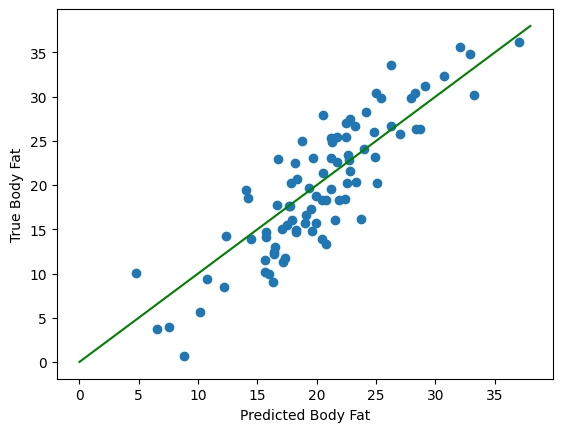

In [ ]:
plt.scatter(y_pred, y_test)
plt.plot([0, 38], [0, 38], color = 'green')
plt.xlabel('Predicted Body Fat')
plt.ylabel('True Body Fat')

Себя померил

In [ ]:
Sex = '0'
Age = 25
Weight  = 81.7
Height  = 1.77
Neck  = 40
Chest  = 107
Abdomen = 93
Hip  = 93
Thigh  = 60
Knee = 41
Ankle  = 23
Biceps  = 39
Forearm  = 30
Wrist  = 19.5

res  = {'Sex': [Sex], 'Age': [Age], 'Weight': [Weight], 'Height': [Height], 'Neck': [Neck], 'Chest': [Chest], 'Abdomen': [Abdomen], 'Hip': [Hip], 'Thigh': [Thigh], 'Knee': [Knee], 'Ankle': [Ankle],
        'Biceps': [Biceps], 'Forearm': [Forearm], 'Wrist': [Wrist]}

# Create DataFrame
res = pd.DataFrame(res)

y_pred = n.predict(res)
print(y_pred)


[15.90884608]


Нейросеть получилась удачной, плюс минус то что есть то и ответила